1. Install an image processing/computer vision library on your computer (OpenCV) 

In [1]:
import cv2

# Check if OpenCV is installed
try:
    print("OpenCV is installed. Version:", cv2.__version__)
except ImportError:
    print("OpenCV is not installed. Please install it using 'pip install opencv-python'")

OpenCV is installed. Version: 4.12.0


2. Open an image (lena.tif), display its size, plot/write the image. 

Image shape: (512, 512, 3)


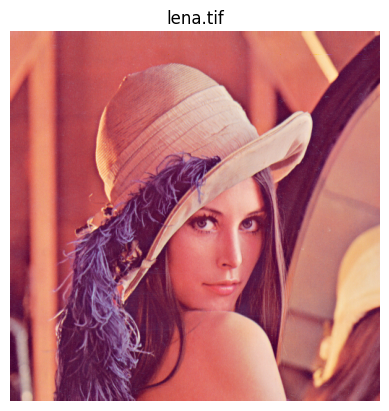

True

In [2]:
# Open the image
img = cv2.imread('lena.tif')

# Display its size
print("Image shape:", img.shape)

# Plot the image
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('lena.tif')
plt.axis('off')
plt.show()

# Write the image to disk (optional)
cv2.imwrite('lena_copy.tif', img)

3. Apply filters that blur/sharpen the image (https://learnopencv.com/image-filtering-using
convolution-in-opencv/). Test these functions with at least 2 values for the parameters 
(when the function has at least one parameter). Plot the results (or save the images). 

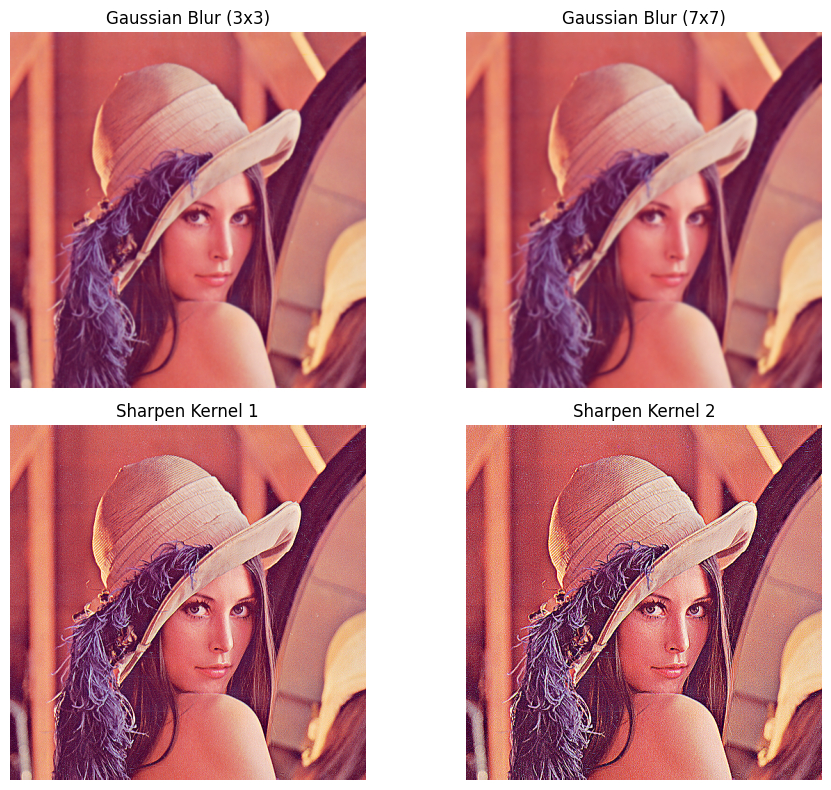

In [3]:
import numpy as np
# Apply blur and sharpen filters to the image

# Blur with different kernel sizes
blur1 = cv2.GaussianBlur(img, (3, 3), 0)
blur2 = cv2.GaussianBlur(img, (7, 7), 0)

# Sharpen using convolution kernels
sharpen_kernel1 = np.array([[0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]])
sharpen1 = cv2.filter2D(img, -1, sharpen_kernel1)

sharpen_kernel2 = np.array([[0, -2, 0],
                            [-2, 9, -2],
                            [0, -2, 0]])
sharpen2 = cv2.filter2D(img, -1, sharpen_kernel2)

# Plot results
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].imshow(cv2.cvtColor(blur1, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Gaussian Blur (3x3)')
axs[0, 0].axis('off')

axs[0, 1].imshow(cv2.cvtColor(blur2, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('Gaussian Blur (7x7)')
axs[0, 1].axis('off')

axs[1, 0].imshow(cv2.cvtColor(sharpen1, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('Sharpen Kernel 1')
axs[1, 0].axis('off')

axs[1, 1].imshow(cv2.cvtColor(sharpen2, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title('Sharpen Kernel 2')
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

### 4. Apply the following filter

The filter \( w \) is defined as:

\[
w =
\begin{bmatrix}
a & 0 & a \\
0 & 9 & 0 \\
-b & -2 & -b
\end{bmatrix},
\quad a,b \in \mathbb{R}.
\]

This filter emphasizes horizontal and diagonal edges while preserving the center pixel (weighted by 9).  
Varying \( a \) and \( b \) changes how strongly the filter enhances or suppresses edge regions.  
Test the effect for several parameter pairs such as  
\((a,b) = (1,1), (2,1), (1,2), (0.5,0.5)\).


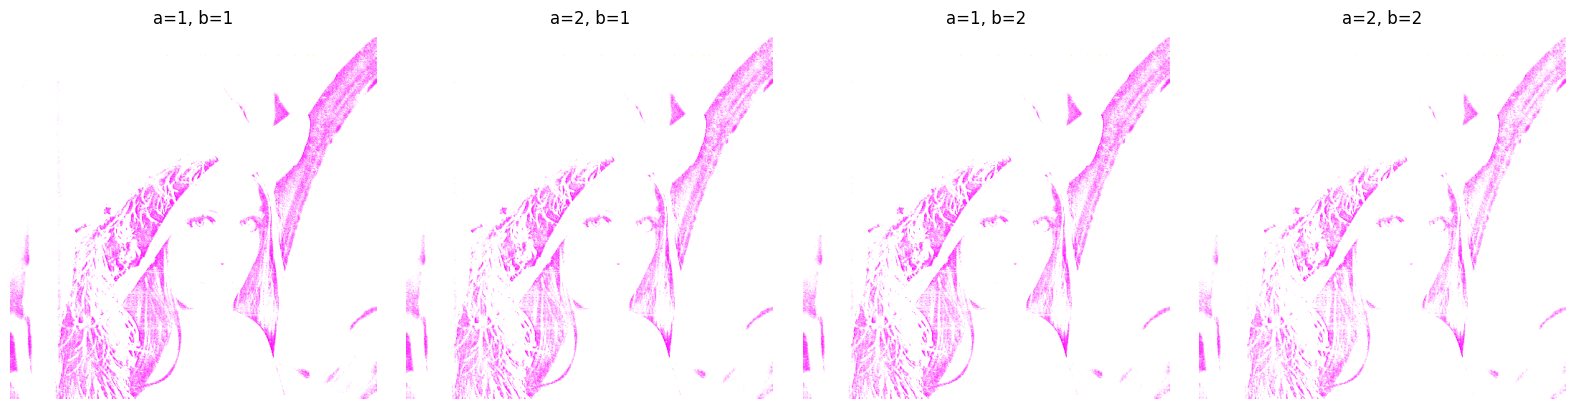

In [4]:
# Define a function to apply the custom filter with parameters a and b
def apply_custom_filter(img, a, b):
    kernel = np.array([[0, a, 0],
                       [-2, 9, b],
                       [0, -2, 0]])
    return cv2.filter2D(img, -1, kernel)

# Test the filter with different values of a and b
params = [(1, 1), (2, 1), (1, 2), (2, 2)]
fig, axs = plt.subplots(1, len(params), figsize=(16, 4))
for i, (a, b) in enumerate(params):
    filtered_img = apply_custom_filter(img, a, b)
    axs[i].imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))
    axs[i].set_title(f'a={a}, b={b}')
    axs[i].axis('off')
plt.tight_layout()
plt.show()

5. Rotate an image using different angles, clockwise and counterclockwise. How can an 
image rotation function be implemented?

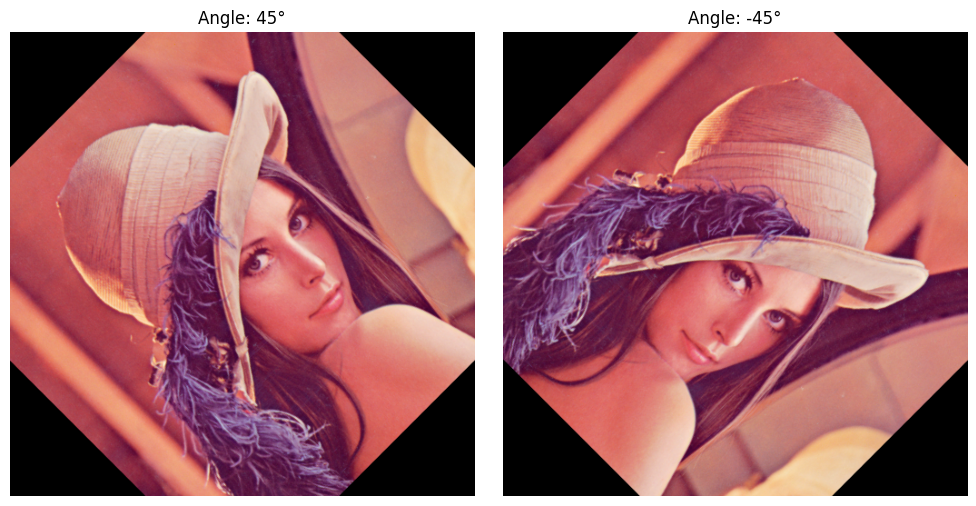

In [5]:
def rotate_image(img, angle):
    # Get image dimensions
    (h, w) = img.shape[:2]
    # Calculate the center of the image
    center = (w // 2, h // 2)
    # Get the rotation matrix
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    # Perform the rotation
    rotated = cv2.warpAffine(img, M, (w, h))
    return rotated

# Example usage: rotate by +45 (counterclockwise) and -45 (clockwise)
angles = [45, -45]
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for i, angle in enumerate(angles):
    rot_img = rotate_image(img, angle)
    axs[i].imshow(cv2.cvtColor(rot_img, cv2.COLOR_BGR2RGB))
    axs[i].set_title(f'Angle: {angle}°')
    axs[i].axis('off')
plt.tight_layout()
plt.show()

6. Write a function that crops a rectangular part of an image. The parameters of this function 
are the position of the upper, left pixel in the image, where the cropping starts, the width 
and the length of the rectangle. 

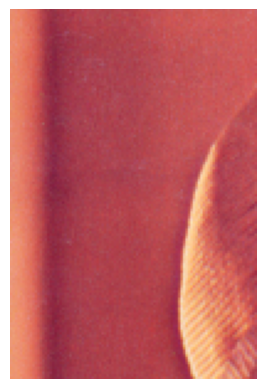

In [6]:
def crop_image(img, x, y, width, height):
    """
    Crops a rectangular part of the image.

    Parameters:
        img (numpy.ndarray): Input image.
        x (int): X-coordinate (column) of the upper-left pixel.
        y (int): Y-coordinate (row) of the upper-left pixel.
        width (int): Width of the rectangle.
        height (int): Height of the rectangle.

    Returns:
        numpy.ndarray: Cropped image.
    """
    return img[y:y+height, x:x+width]

# Example usage:
cropped = crop_image(img, 50, 50, 100, 150)
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

7. Create an emoticon image (emoji) using OpenCV functions. Include this image in the 
archive that you’ll send at the end of the semester (save it as your_name.jpg). 

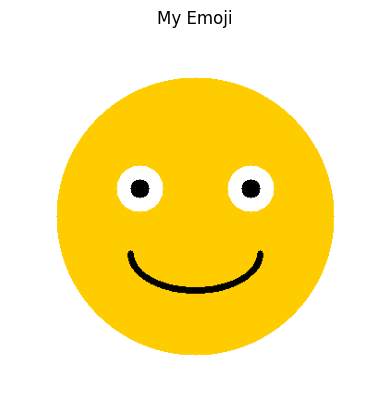

True

In [7]:
# Create a blank white image
emoji_img = np.ones((400, 400, 3), dtype=np.uint8) * 255

# Draw face (circle)
cv2.circle(emoji_img, (200, 200), 150, (0, 204, 255), -1)  # yellow face

# Draw eyes
cv2.circle(emoji_img, (140, 170), 25, (255, 255, 255), -1)  # left eye white
cv2.circle(emoji_img, (260, 170), 25, (255, 255, 255), -1)  # right eye white
cv2.circle(emoji_img, (140, 170), 10, (0, 0, 0), -1)        # left eye pupil
cv2.circle(emoji_img, (260, 170), 10, (0, 0, 0), -1)        # right eye pupil

# Draw smile (ellipse)
cv2.ellipse(emoji_img, (200, 240), (70, 40), 0, 0, 180, (0, 0, 0), 5)

# Show the emoji
plt.imshow(cv2.cvtColor(emoji_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('My Emoji')
plt.show()

# Save the emoji image
cv2.imwrite('your_name.jpg', emoji_img)

8. Write a short essay about the ethics in Computer Vision (some ideas: 1, 2, 3) 

### Ethics in Computer Vision: A Short Essay

Computer vision (CV), a subfield of artificial intelligence, enables machines to analyze and interpret visual data. Its applications—ranging from facial recognition and emotion detection to surveillance and medical imaging—have profound ethical, social, and political implications.

#### Power and Autonomy

Rosalie Waelen (2024) frames CV ethics through the lens of power, examining how CV technologies can empower or disempower individuals. Dispositional power refers to the ability of CV to affect autonomy by reducing informational control, anonymity, and epistemic agency. For example, automated surveillance can limit a person's ability to move anonymously or control how their data is used, impacting their self-ownership and self-development.

Episodic power highlights how CV enables actors (governments, employers, insurers) to exercise control over others, often through automated surveillance. This can lead to over-enforcement, workplace monitoring, and peer-to-peer surveillance, challenging individuals' freedom to act and develop independently.

Systemic power addresses how CV reinforces societal structures, such as surveillance capitalism and algorithmic bias. CV systems can perpetuate discrimination, normalize stereotypes, and contribute to environmental harm through large-scale data processing. These systemic effects can limit opportunities, self-worth, and collective self-legislation.

Constitutive power focuses on how CV shapes behavior and identity. Surveillance and personalization can lead to the internalization of norms, manipulation of choices, and discomfort from being constantly watched, potentially harming autonomy and self-development.

#### Critiques of AI Ethics

Luke Munn (2023) critiques the effectiveness of AI ethical principles, arguing that many guidelines are vague, isolated from real-world contexts, and lack enforcement ("toothless principles"). He suggests that ethical frameworks often serve corporate interests and fail to address deeper issues of power, justice, and systemic inequality. Munn advocates for broader approaches—such as AI justice, which considers sociopolitical dynamics—and more concrete measures like accuracy, auditing, and governance.

#### Moving Forward

Ethics in computer vision must go beyond abstract principles and address real-world impacts on autonomy, justice, and power. This includes:

- Ensuring transparency and accountability in CV systems.
- Addressing algorithmic bias and promoting fairness.
- Considering the environmental and social costs of large-scale data processing.
- Engaging affected communities in the design and deployment of CV technologies.
- Supporting regulation and governance to enforce ethical standards.

Ultimately, ethical progress in computer vision requires critical reflection on power dynamics, meaningful stakeholder engagement, and concrete actions to mitigate harm and promote emancipatory progress.

![alt text](<ChatGPT Image Oct 15, 2025, 08_52_53 AM.png>)